<a href="https://colab.research.google.com/github/Deep-of-Machine/pneumonia/blob/main/pneumonia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator()

In [ ]:
!unzip -qq /content/drive/MyDrive/폐렴/chest_xray.zip

In [ ]:
train_data_dir = '/content/train'
test_data_dir = '/content/test'
validation_data_dir = '/content/val'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical')

Found 16 images belonging to 2 classes.


In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
predictions = Dense(2,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

In [ ]:
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

In [ ]:
batch_size = 16

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = 5219 // batch_size,
                    validation_data=validation_generator,
                    validation_steps=16// batch_size,
                    epochs=10 ,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

Epoch 1/10
326/326 [==============================] - ETA: 0s - loss: 0.1024 - accuracy: 0.9711
Epoch 00001: val_loss improved from 0.25174 to 0.20579, saving model to best_model_class.hdf5
326/326 [==============================] - 143s 439ms/step - loss: 0.1024 - accuracy: 0.9711 - val_loss: 0.2058 - val_accuracy: 0.9375
Epoch 2/10
326/326 [==============================] - ETA: 0s - loss: 0.1058 - accuracy: 0.9691
Epoch 00002: val_loss improved from 0.20579 to 0.14319, saving model to best_model_class.hdf5
326/326 [==============================] - 143s 439ms/step - loss: 0.1058 - accuracy: 0.9691 - val_loss: 0.1432 - val_accuracy: 1.0000
Epoch 3/10
326/326 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9643
Epoch 00003: val_loss improved from 0.14319 to 0.14316, saving model to best_model_class.hdf5
326/326 [==============================] - 143s 438ms/step - loss: 0.1135 - accuracy: 0.9643 - val_loss: 0.1432 - val_accuracy: 1.0000
Epoch 4/10
326/326 [=====

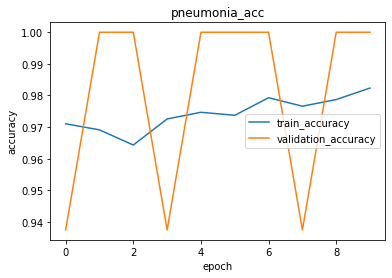

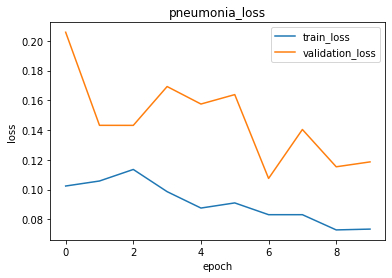

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'pneumonia_acc')
plot_loss(history,'pneumonia_loss') 